In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px

In [4]:

df = pd.read_csv(r'C:\Users\GamingWorld\Documents\kaggle\gym_members_exercise_tracking.csv')
df.head()

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
0,56,Male,88.3,1.71,180,157,60,1.69,1313.0,Yoga,12.6,3.5,4,3,30.20
1,46,Female,74.9,1.53,179,151,66,1.30,883.0,HIIT,33.9,2.1,4,2,32.00
2,32,Female,68.1,1.66,167,122,54,1.11,677.0,Cardio,33.4,2.3,4,2,24.71
3,25,Male,53.2,1.70,190,164,56,0.59,532.0,Strength,28.8,2.1,3,1,18.41
4,38,Male,46.1,1.79,188,158,68,0.64,556.0,Strength,29.2,2.8,3,1,14.39


In [6]:
num_columns = len(df.columns)
num_columns

15

In [17]:
def summary(df):
    summ = pd.DataFrame(df.dtypes, columns=['data type'])
    summ['#missing'] = df.isnull().sum().values
    summ['Duplicate'] = df.duplicated().sum()
    summ['#unique'] = df.nunique().values
    desc = pd.DataFrame(df.describe(include='all').transpose())
    summ['min'] = desc['min'].values
    summ['max'] = desc['max'].values
    summ['avg'] = desc['mean'].values
    summ['std dev'] = desc['std'].values
    summ['top value'] = desc['top'].values
    summ['Freq'] = desc['freq'].values

    return summ

summary(df).style.background_gradient()

,data type,#missing,Duplicate,#unique,min,max,avg,std dev,top value,Freq
Age,int64,0,0,42,18.000000,59.000000,38.683453,12.180928,nan,nan
Gender,object,0,0,2,nan,nan,nan,nan,Male,511
Weight (kg),float64,0,0,532,40.000000,129.900000,73.854676,21.207500,nan,nan
Height (m),float64,0,0,51,1.500000,2.000000,1.722580,0.127720,nan,nan
Max_BPM,int64,0,0,40,160.000000,199.000000,179.883864,11.525686,nan,nan
Avg_BPM,int64,0,0,50,120.000000,169.000000,143.766701,14.345101,nan,nan
Resting_BPM,int64,0,0,25,50.000000,74.000000,62.223022,7.327060,nan,nan
Session_Duration (hours),float64,0,0,147,0.500000,2.000000,1.256423,0.343033,nan,nan
Calories_Burned,float64,0,0,621,303.000000,1783.000000,905.422405,272.641516,nan,nan
Workout_Type,object,0,0,4,nan,nan,nan,nan,Strength,258


In [18]:
## EDA

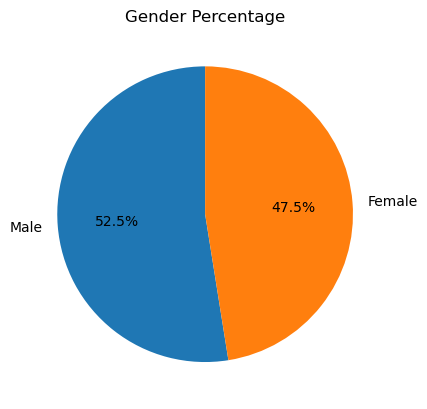

In [19]:
gender_counts = df['Gender'].value_counts()
gender_percentage = gender_counts / gender_counts.sum() * 100

plt.pie(gender_percentage, labels=gender_percentage.index, autopct='%1.1f%%', startangle=90)
plt.title("Gender Percentage")
plt.show()


C:\Users\GamingWorld\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


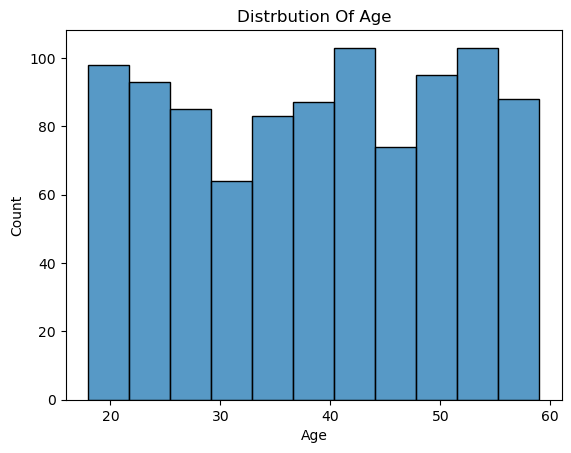

In [20]:
sns.histplot(data=df, x='Age')
plt.title("Distrbution Of Age")
plt.show()

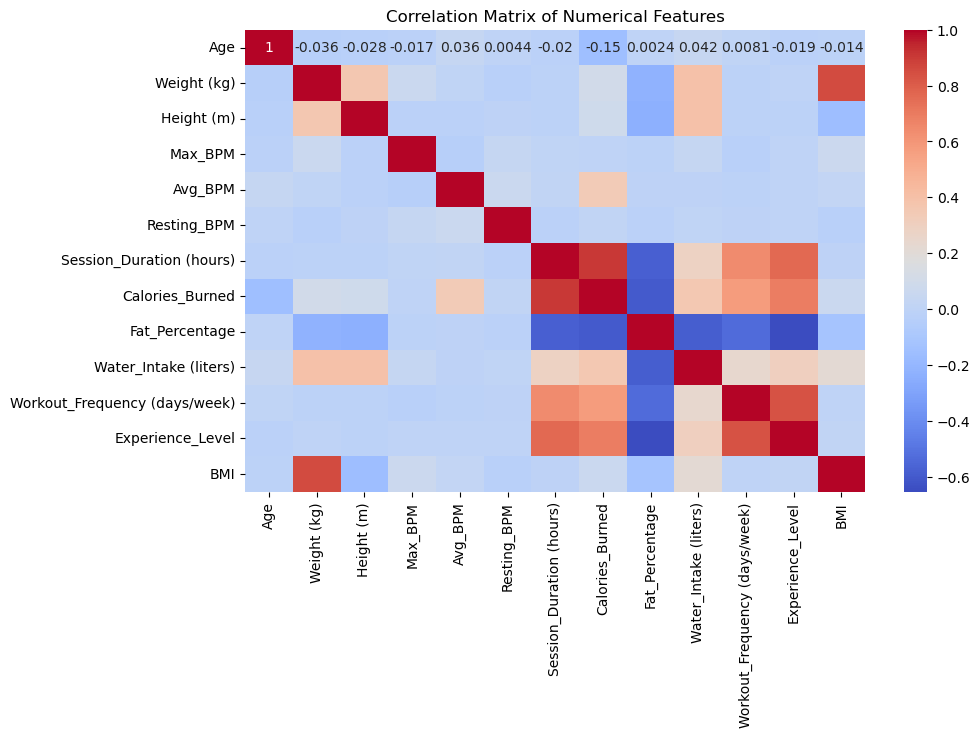

In [21]:
numerical_data = df.select_dtypes(include=['int64', 'float64'])

corr_matrix = numerical_data.corr()

plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix of Numerical Features")
plt.show()

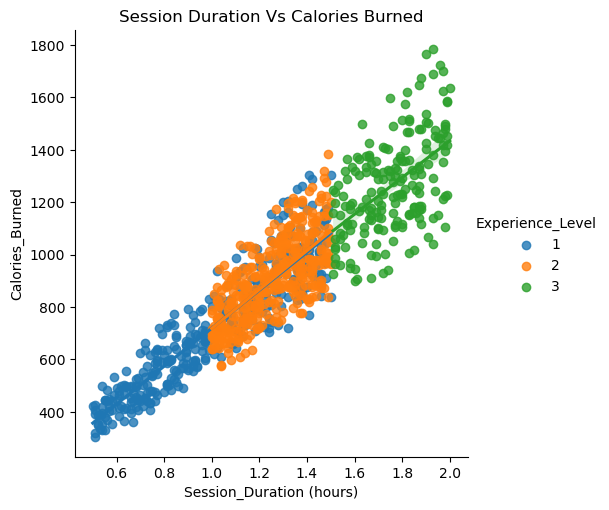

In [22]:
sns.lmplot( data=df , x="Session_Duration (hours)", y="Calories_Burned", hue="Experience_Level")
plt.title('Session Duration Vs Calories Burned')
plt.show()

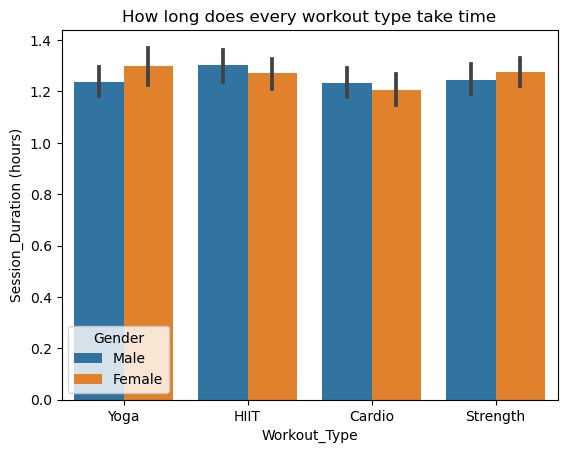

In [23]:
sns.barplot(x='Workout_Type', y='Session_Duration (hours)', data=df, hue='Gender')
plt.title('How long does every workout type take time')
plt.show()


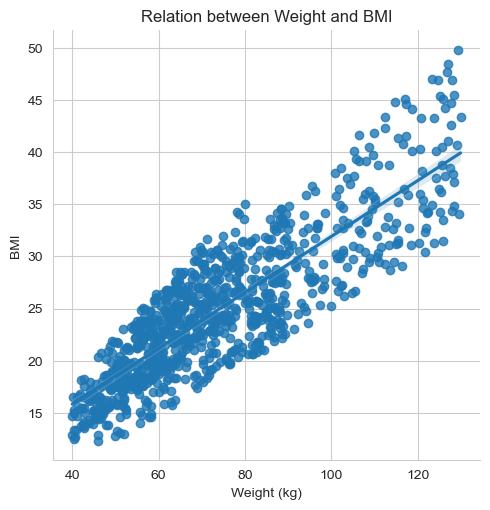

In [24]:
sns.set_style('whitegrid')
sns.lmplot(x ='Weight (kg)', y ='BMI', data = df)
plt.title('Relation between Weight and BMI')
plt.show()

C:\Users\GamingWorld\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\GamingWorld\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\GamingWorld\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\GamingWorld\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values

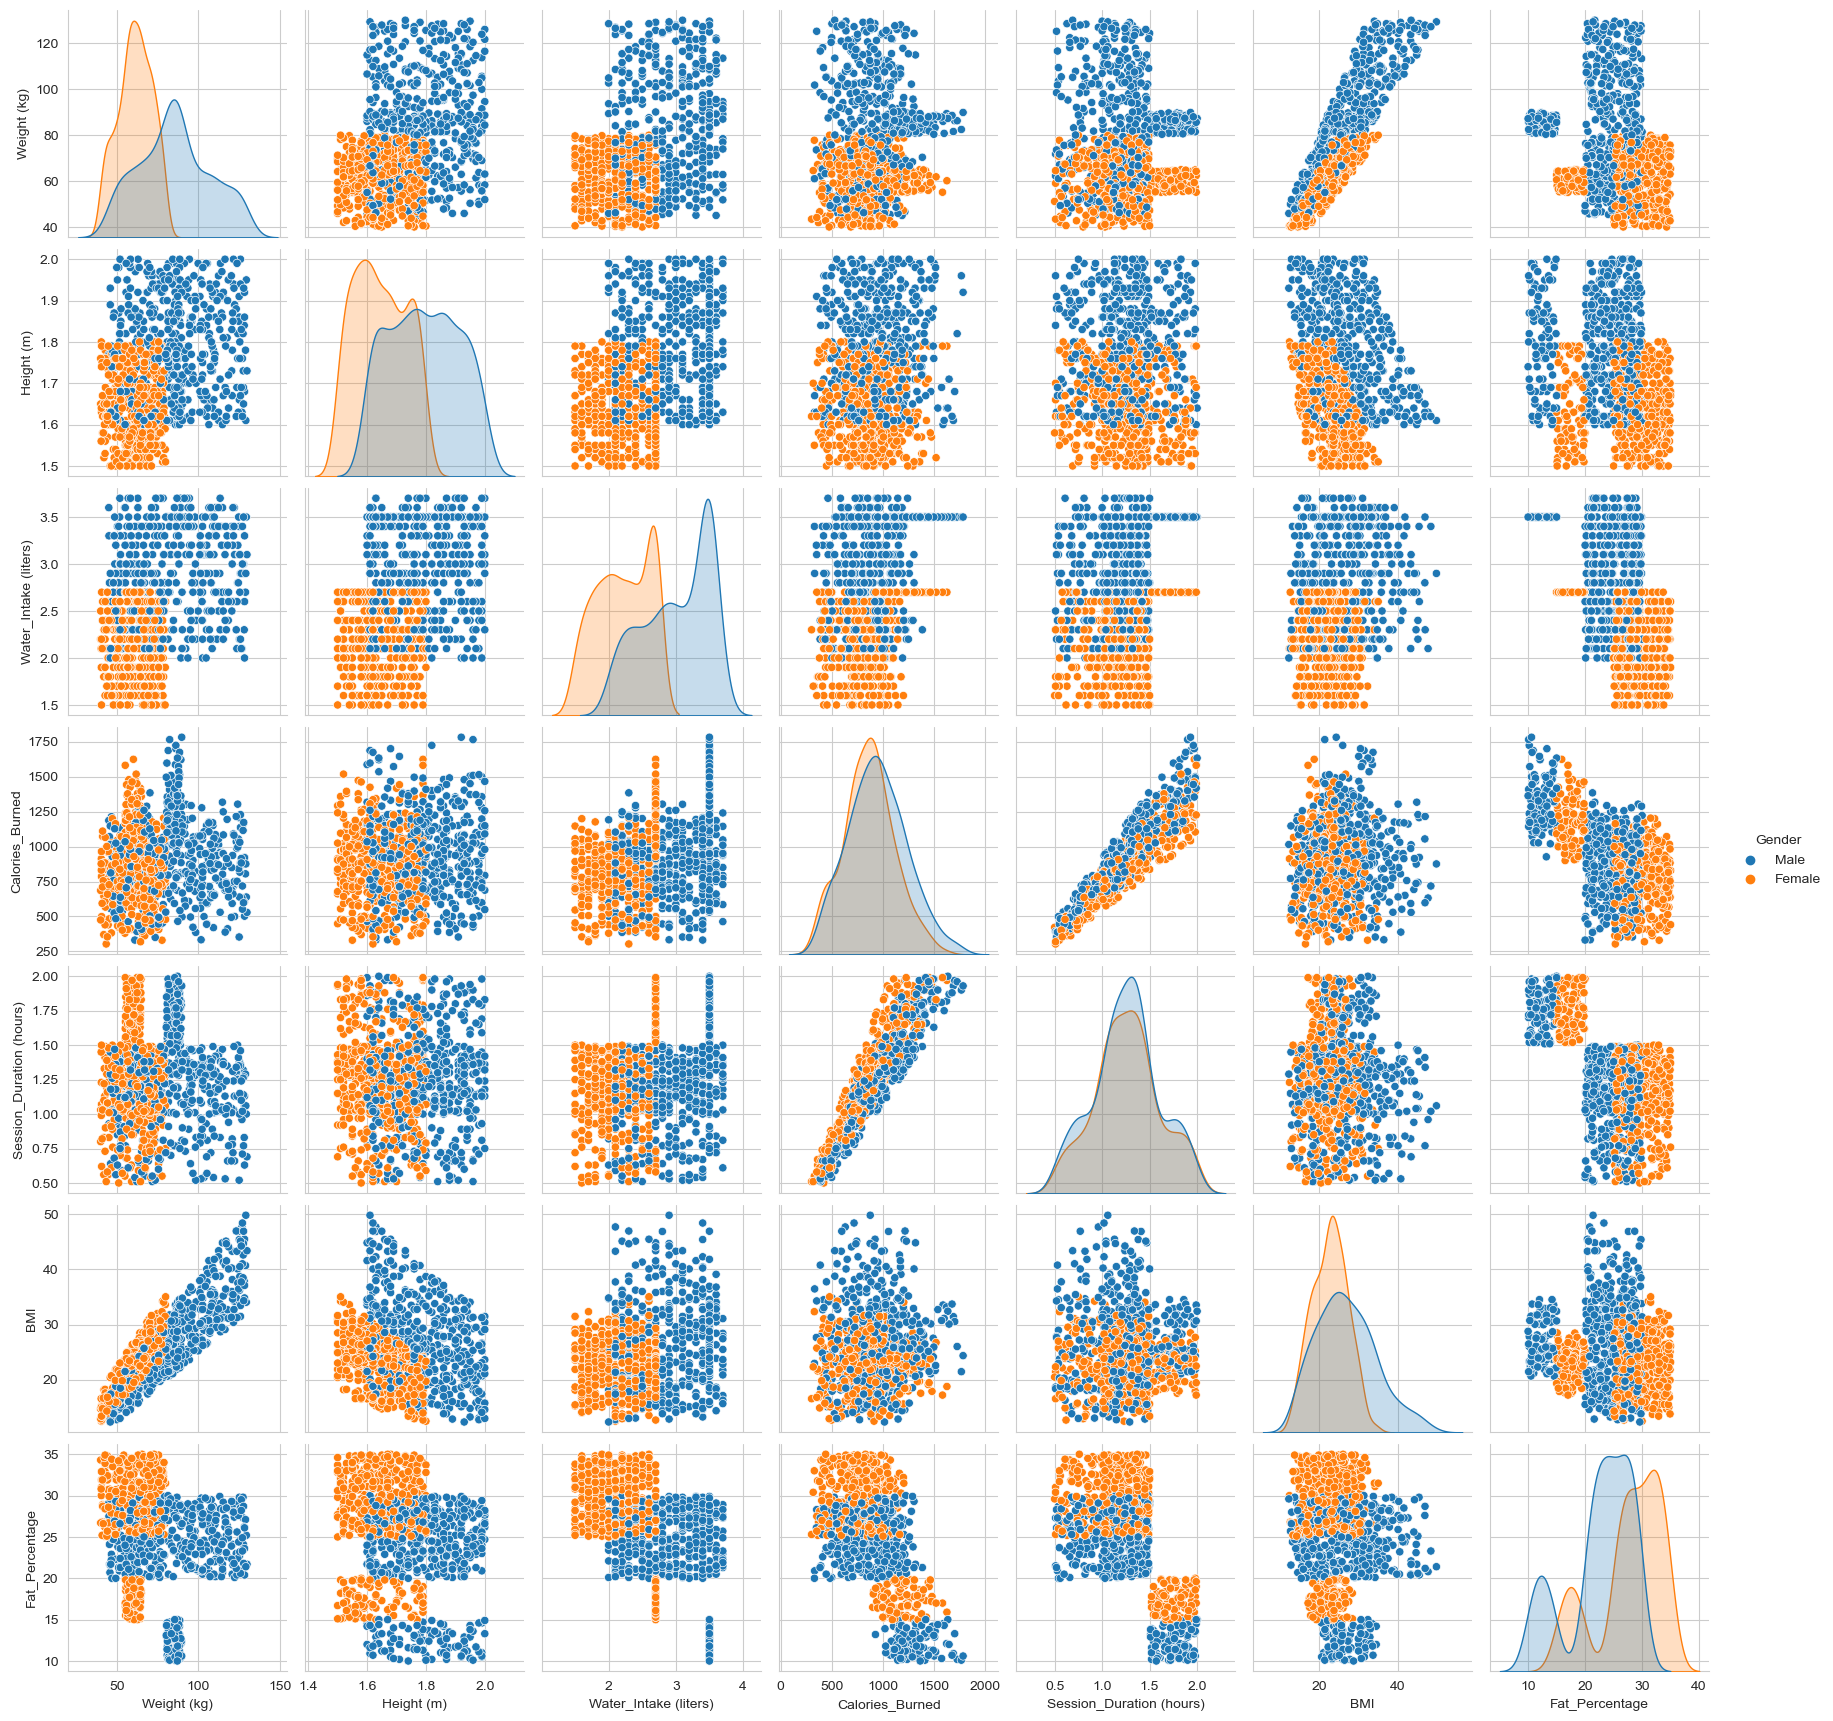

In [25]:
newdf = df[['Weight (kg)', 'Height (m)', 'Water_Intake (liters)', 'Calories_Burned', 'Session_Duration (hours)','BMI','Fat_Percentage','Gender']]

sns.pairplot(data=newdf, hue= 'Gender')

In [41]:

total_count = df.shape[0]

workout_type_counts = df['Workout_Type'].value_counts()

workout_type_pct = (workout_type_counts / total_count * 100).round(2)

Workout_Type = workout_type_pct.reset_index()
Workout_Type.columns = ['Workout_Type', 'member_pct']

Workout_Type = Workout_Type.sort_values(by='member_pct', ascending=False).reset_index(drop=True)

print(Workout_Type)


  Workout_Type  member_pct
0     Strength       26.52
1       Cardio       26.21
2         Yoga       24.56
3         HIIT       22.71


In [42]:

##Observación: La mayoría de las personas (26.52%) prefieren hacer entrenamiento de fuerza.
##Conclusión: Las personas están más enfocadas en desarrollar músculo en lugar de solo centrarse en verse delgadas.
##Acción: Debería haber más equipos que se enfoquen en el desarrollo muscular.

In [43]:
total_count = df.shape[0]
gender_counts = df['Gender'].value_counts()
gender_pct = (gender_counts / total_count * 100).round(2)

Gender = gender_pct.reset_index()
Gender.columns = ['Gender', 'member_pct']
Gender = Gender.sort_values(by='member_pct', ascending=False).reset_index(drop=True)

print(Gender)


   Gender  member_pct
0    Male       52.52
1  Female       47.48


In [44]:
##Observacion: Los hombres tienden a ir mas al gimnasio que las mujeres
##Conclusion: En general los hombres priorizan mas el fitness  la salud fisica que las mujeres 
##Accion: Hacer estrategias en el gimnasio para atraer mayor publico femenino

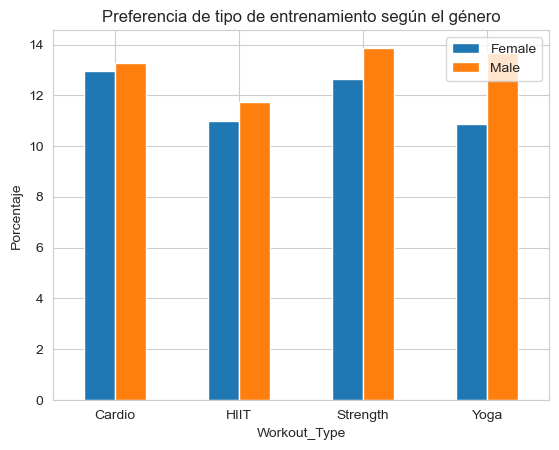

In [46]:

# Agrupar por tipo de entrenamiento y género, y contar los registros
workout_gender_counts = df.groupby(['Workout_Type', 'Gender']).size().unstack(fill_value=0)

# Calcular los porcentajes por género en relación al total de registros y redondear a 2 decimales
workout_gender_pct = (workout_gender_counts / total_count * 100).round(2)

# Renombrar las columnas para coincidir con los resultados deseados
workout_gender_pct.columns = ['Female', 'Male']

# Graficar el resultado
workout_gender_pct.plot(kind='bar')
plt.title('Preferencia de tipo de entrenamiento según el género')
plt.ylabel('Porcentaje')
plt.xticks(rotation=0)
plt.show()

In [47]:
##Observacion:Cardio es el entrenamiento mas popular entre hombres y mujeres , los hombres prefieren entrenamiento de fuerza
##Conclusion: El cardio puede ser una oportunidad para el gimnasio para atraer mas gente y el entrenamiento de fuerza mas enfasis en estrategias para los hombres
##Accion: Promover entrenamiento de cardio, mejorar la propuesta del Yoga, promover competiciones de fuerza.

In [49]:
bins = [0, 18, 25, 35, 45, 55, 65, 100]
labels = ['Under 18', '18-25', '26-35', '36-45', '46-55', '56-65', '65+']
df['Age_Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False )

In [50]:
age_group_counts = df['Age_Group'].value_counts()

age_group_pct = (age_group_counts / total_count * 100).round(2)

# Convertir a un DataFrame para obtener el mismo formato
Age_Group = age_group_pct.reset_index()
Age_Group.columns = ['Age_Group', 'member_pct']

Age_Group = Age_Group.sort_values(by='member_pct', ascending=False).reset_index(drop=True)

print(Age_Group)

  Age_Group  member_pct
0     46-55       26.10
1     36-45       23.43
2     26-35       22.61
3     18-25       16.96
4     56-65       10.89
5  Under 18        0.00
6       65+        0.00


In [ ]:
## Escojemos el grupo mas ampplio del data que seria el de 46-55

In [51]:
age_46_55_df = df[df['Age_Group'] == '46-55']

total_count_age_46_55 = age_46_55_df.shape[0]

workout_type_counts = age_46_55_df['Workout_Type'].value_counts()

workout_type_pct = (workout_type_counts / total_count_age_46_55 * 100).round(2)

Workout_Type_Age = workout_type_pct.reset_index()
Workout_Type_Age.columns = ['Workout_Type', 'member_pct']

Workout_Type_Age['Age'] = '46-55'

Workout_Type_Age = Workout_Type_Age.sort_values(by='member_pct', ascending=False).reset_index(drop=True)

print(Workout_Type_Age)


  Workout_Type  member_pct    Age
0         HIIT       25.98  46-55
1     Strength       25.98  46-55
2         Yoga       24.41  46-55
3       Cardio       23.62  46-55


In [52]:
## Observación: La mayoría de los miembros (26.10%) están en el grupo de edad de 46-55 años y prefieren tanto el entrenamiento de fuerza como el HIIT.
##Interpretación: Las personas en el grupo de edad de 46-55 años están cada vez más enfocadas en la salud y el bienestar, buscando formas de desarrollar músculo, lo cual puede mejorar el metabolismo y el bienestar general.
##Acción: Dirigir los esfuerzos de marketing hacia el grupo de edad de 46-55 años, mejorando las ofertas del gimnasio, incluyendo más máquinas de entrenamiento de fuerza y clases de HIIT. Para fomentar inscripciones y participación.

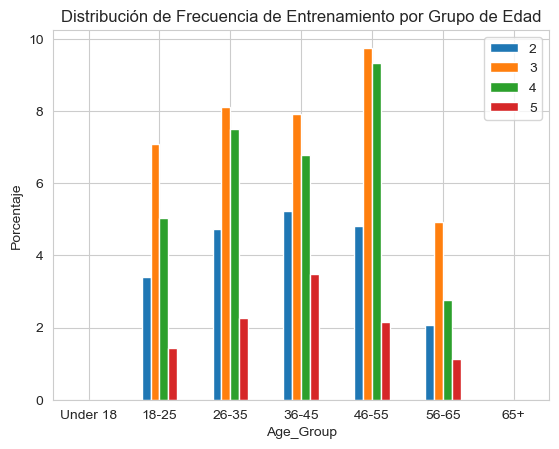

In [57]:
Workout_Frequency = round(
    (df.pivot_table(index='Age_Group', columns='Workout_Frequency (days/week)', aggfunc='size', fill_value=0) / len(df) * 100), 2
).reset_index().rename_axis(columns=None)

Workout_Frequency.set_index('Age_Group').plot(kind='bar')
plt.title('Distribución de Frecuencia de Entrenamiento por Grupo de Edad')
plt.ylabel('Porcentaje')
plt.xticks(rotation=0)
plt.show()


In [58]:
##Observación :El grupo de edad de 26-55 muestra un alto compromiso con el gimnasio, especialmente aquellos que asisten 3, 4 y 5 días a la semana. El grupo de 18-25 años tiene una menor participación general, aunque algunos asisten regularmente (especialmente 3 días a la semana).

##Interpretación: Enfocarse en el rango de 26-55 años, que asisten 3-5 días a la semana, es una oportunidad para campañas de marketing y programas específicos. Este grupo es constante y podría beneficiarse de ofertas personalizadas. Aunque el grupo de 18-25 tiene menor representación, hay potencial para atraerlos con programas atractivos.

##Acción: Lanzar campañas dirigidas a los de 26-55 años, destacando la consistencia (3-5 días a la semana) y diseñando programas adaptados a sus metas. Crear promociones para quienes asisten regularmente, mejorando su compromiso y retención. Considerar programas introductorios o clases especiales para atraer al grupo de 18-25 años sin sobreinvertir en comparación con los grupos más comprometidos.

In [59]:
def categorize_bmi(bmi):
    if bmi < 18.5:
        return 'Underweight'
    elif 18.5 <= bmi < 25:
        return 'Normal weight'
    elif 25 <= bmi < 30:
        return 'Overweight'
    else:
        return 'Obesity'

df['Weight_Category'] = df['BMI'].apply(categorize_bmi)

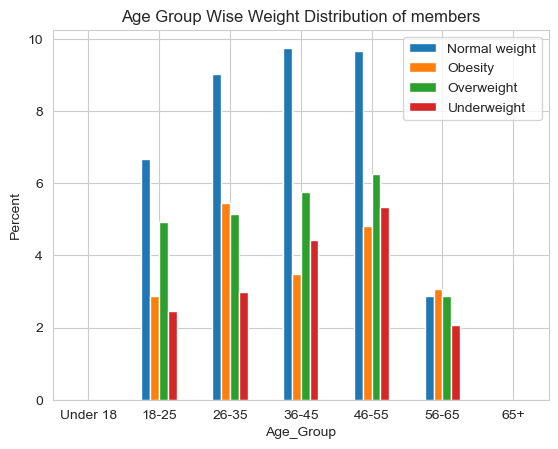

In [60]:
Weight_Category = round((df.pivot_table(index='Age_Group', columns='Weight_Category', aggfunc='size', fill_value=0)/len(df)*100),2)\
                                .reset_index().rename_axis(columns=None)
Weight_Category.set_index('Age_Group').plot(kind='bar')
plt.title('Age Group Wise Weight Distribution of members')
plt.ylabel('Percent')
plt.xticks(rotation=0)
plt.grid(True)
plt.show()

In [ ]:
##Observaciones: El grupo de 26-35 años tiene el mayor porcentaje de personas con peso normal (9.04%), mientras que en 46-55 se observa un aumento en obesidad (4.83%) y sobrepeso (6.27%), lo que indica la necesidad de programas de pérdida de peso específicos. Además, el grupo de 18-25 tiene un mayor porcentaje de personas con bajo peso (2.47%).

##Interpretación:El porcentaje significativo de obesidad y sobrepeso en el grupo de 46-55 años sugiere desarrollar programas de pérdida de peso y orientación nutricional específicos para ellos. Los grupos más jóvenes (18-35) con peso normal presentan oportunidades para enfocarse en el mantenimiento y la mejora de la condición física mediante clases avanzadas o competencias. Resaltar historias de éxito y promocionar programas de control de peso puede atraer a más personas en categorías de sobrepeso y obesidad.

##Acciones:Programas Específicos: Implementar programas de control de peso para el grupo de 46-55 años con educación y estrategias prácticas.
##Evaluaciones y Entrenamiento: Ofrecer evaluaciones y entrenamientos personalizados para personas con sobrepeso u obesidad.
##Contenido Atractivo: Crear contenido que motive a los jóvenes sobre los beneficios de un estilo de vida saludable.
##Talleres y Seminarios: Organizar talleres de nutrición y salud para los de mediana edad.

In [61]:
df['Fat_Category'] = pd.cut(df['Fat_Percentage'], 
                            bins=[-float('inf'), 15, 25, float('inf')], 
                            labels=['Low', 'Moderate', 'High'])

Fat_Percentage = df['Fat_Category'].value_counts(normalize=True).mul(100).round(2).reset_index()
Fat_Percentage.columns = ['Fat_Category', 'member_pct']

# Ordena el resultado por 'member_pct' en orden descendente
Fat_Percentage = Fat_Percentage.sort_values(by='member_pct', ascending=False)

print(Fat_Percentage)

  Fat_Category  member_pct
0         High       58.79
1     Moderate       30.63
2          Low       10.59


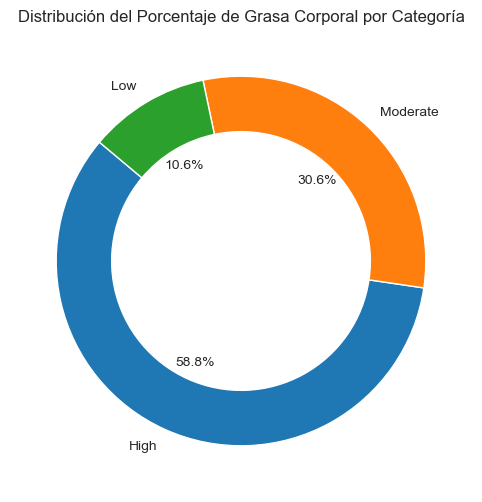

In [62]:
labels = Fat_Percentage['Fat_Category']  # Categorías de grasa corporal
sizes = Fat_Percentage['member_pct']  # Porcentaje de miembros en cada categoría
plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, wedgeprops=dict(width=0.3))

plt.title('Distribución del Porcentaje de Grasa Corporal ')
plt.show()

In [63]:
##La mayoria de personas cuentan con alto indice de grasa corporal 58,6%.

In [ ]:
##Acciones Recomendadas:

##Ampliar Equipos de Fuerza: Aumentar las máquinas de entrenamiento de fuerza y crear programas enfocados en la construcción muscular.
##Fomentar la Participación Femenina: Implementar estrategias de marketing y clases especiales para mujeres, creando un ambiente acogedor.
##Promover Programas de Cardio: Lanzar campañas que resalten el éxito de miembros para atraer más personas a entrenamientos de cardio.
##Enfocarse en el Grupo de 46-55 años: Ajustar la oferta de clases de HIIT y fuerza para este grupo, destacando los beneficios para la salud.
##Programas de Control de Peso: Ofrecer programas de pérdida de peso y asesoramiento nutricional para miembros con sobrepeso y obesidad.
##Fortalecer el Sentido de Comunidad: Organizar talleres, retos y clases especializadas para atraer a miembros de diversas edades y categorías de peso.